In [60]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import utils
from analysis import ModelAnalysis
from sklearn.metrics import (d2_absolute_error_score, max_error,
                             mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error,
                             r2_score)
from sklearn.ensemble import RandomForestRegressor
import numpy as np
np.random.seed(42)


In [61]:
# define models

models = {}
models['forest_default'] = RandomForestRegressor(random_state=42)
for ne in [70,80,90]:
    for md in [18, 20]:
        for mss in [2,3,4]:
            models[f'forest_ne_{ne}_md_{md}_ms_{mss}'] = RandomForestRegressor(
                random_state=42, 
                n_estimators=ne,
                max_depth=md, 
                min_samples_split=mss
                )

# best
# best_tree = DecisionTreeRegressor(
#     random_state=42,
#     max_depth=18,
#     min_samples_leaf=4
# )
# ma = ModelAnalysis(models={
#     'tree_default': tree_default,
#     'tree_default_ms_4': tree_default_ms_4,
#     # 'tree_md_14': tree_md_14,
#     # 'tree_md_16': tree_md_16,
#     # 'tree_md_18': tree_md_18,
#     # 'tree_md_18_ms_4': tree_md_18_ms_4,
#     # 'tree_md_20': tree_md_20,
#     # 'tree_md_22': tree_md_22,
# })
# best_model = {
#     'default_tree': DecisionTreeRegressor(random_state=42),
#     'best_tree': best_tree
#     }
ma = ModelAnalysis(models=models)


In [62]:
ma.train()
_ = ma.predict(split='train')
_ = ma.predict(split='val')
_ = ma.predict(split='test')

Fitting forest_default
Fitting forest_ne_80_md_20_ms_2
Fitting forest_ne_80_md_20_ms_3
Fitting forest_ne_80_md_20_ms_4


/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:115: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:119: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(pred_df[[k for k in self.models.keys() if k != 'Y']],
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:115: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(pred_df, markers=True, alpha=.6,
/Users/marcelrosier/Projects/uni/master/bdp/bdp_project/mental_health/analysis.py:119: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(pred_df[[k for k in self.models.keys() if k != 'Y']],


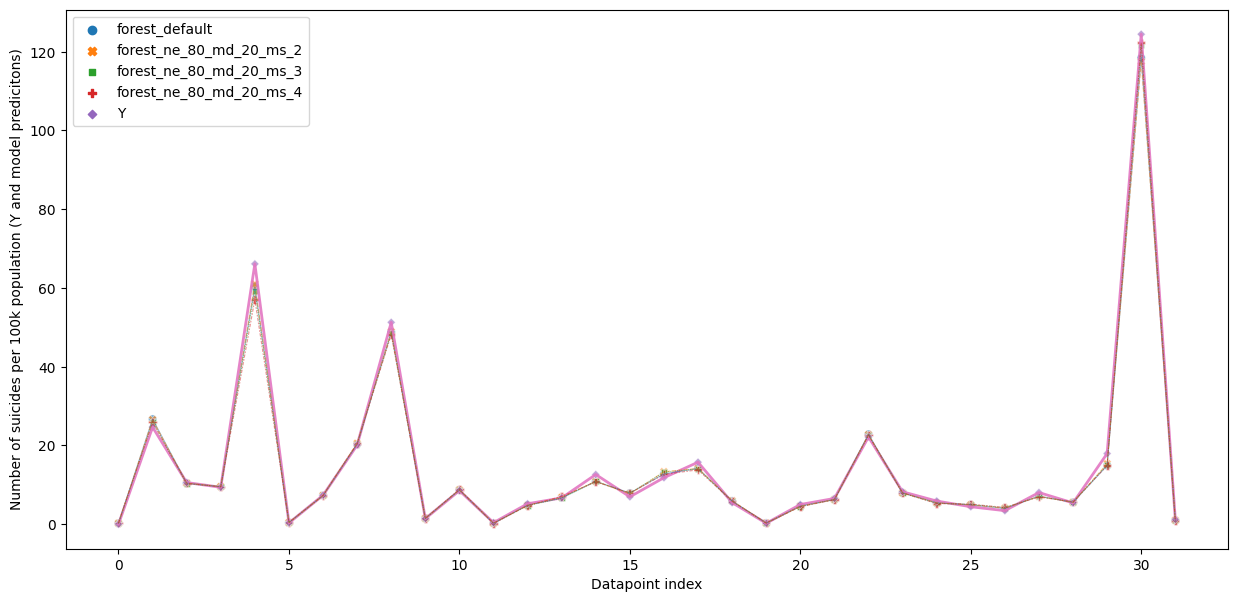

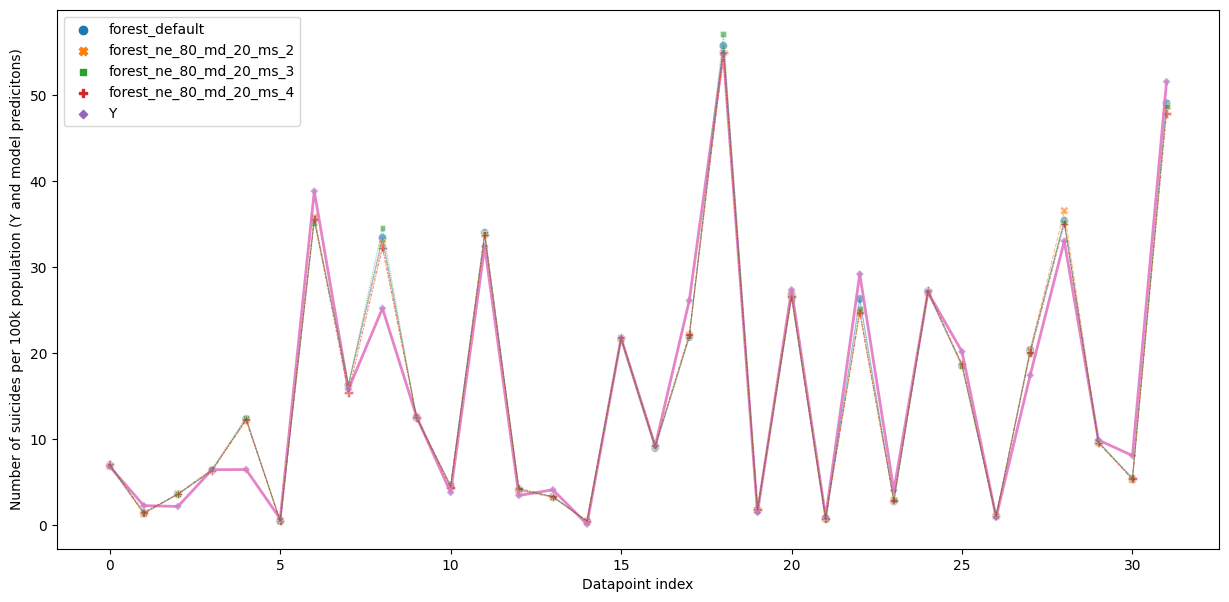

In [63]:
ma.visualize_predictions(split='train')
ma.visualize_predictions(split='val')

mean_squared_error
                     model     score
0           forest_default  2.779186
1  forest_ne_80_md_20_ms_2  2.824043
2  forest_ne_80_md_20_ms_3  3.672032
3  forest_ne_80_md_20_ms_4  5.071724
r2_score
                     model     score
0           forest_default  0.990919
1  forest_ne_80_md_20_ms_2  0.990772
2  forest_ne_80_md_20_ms_3  0.988001
3  forest_ne_80_md_20_ms_4  0.983428
max_error
                     model      score
0           forest_default  27.435600
1  forest_ne_80_md_20_ms_2  27.860625
2  forest_ne_80_md_20_ms_3  36.763326
3  forest_ne_80_md_20_ms_4  49.508935
root_mean_squared_error
                     model     score
0           forest_default  1.667089
1  forest_ne_80_md_20_ms_2  1.680489
2  forest_ne_80_md_20_ms_3  1.916255
3  forest_ne_80_md_20_ms_4  2.252049
mean_absolute_error
                     model     score
0           forest_default  0.808264
1  forest_ne_80_md_20_ms_2  0.812038
2  forest_ne_80_md_20_ms_3  0.884917
3  forest_ne_80_md_20_ms_

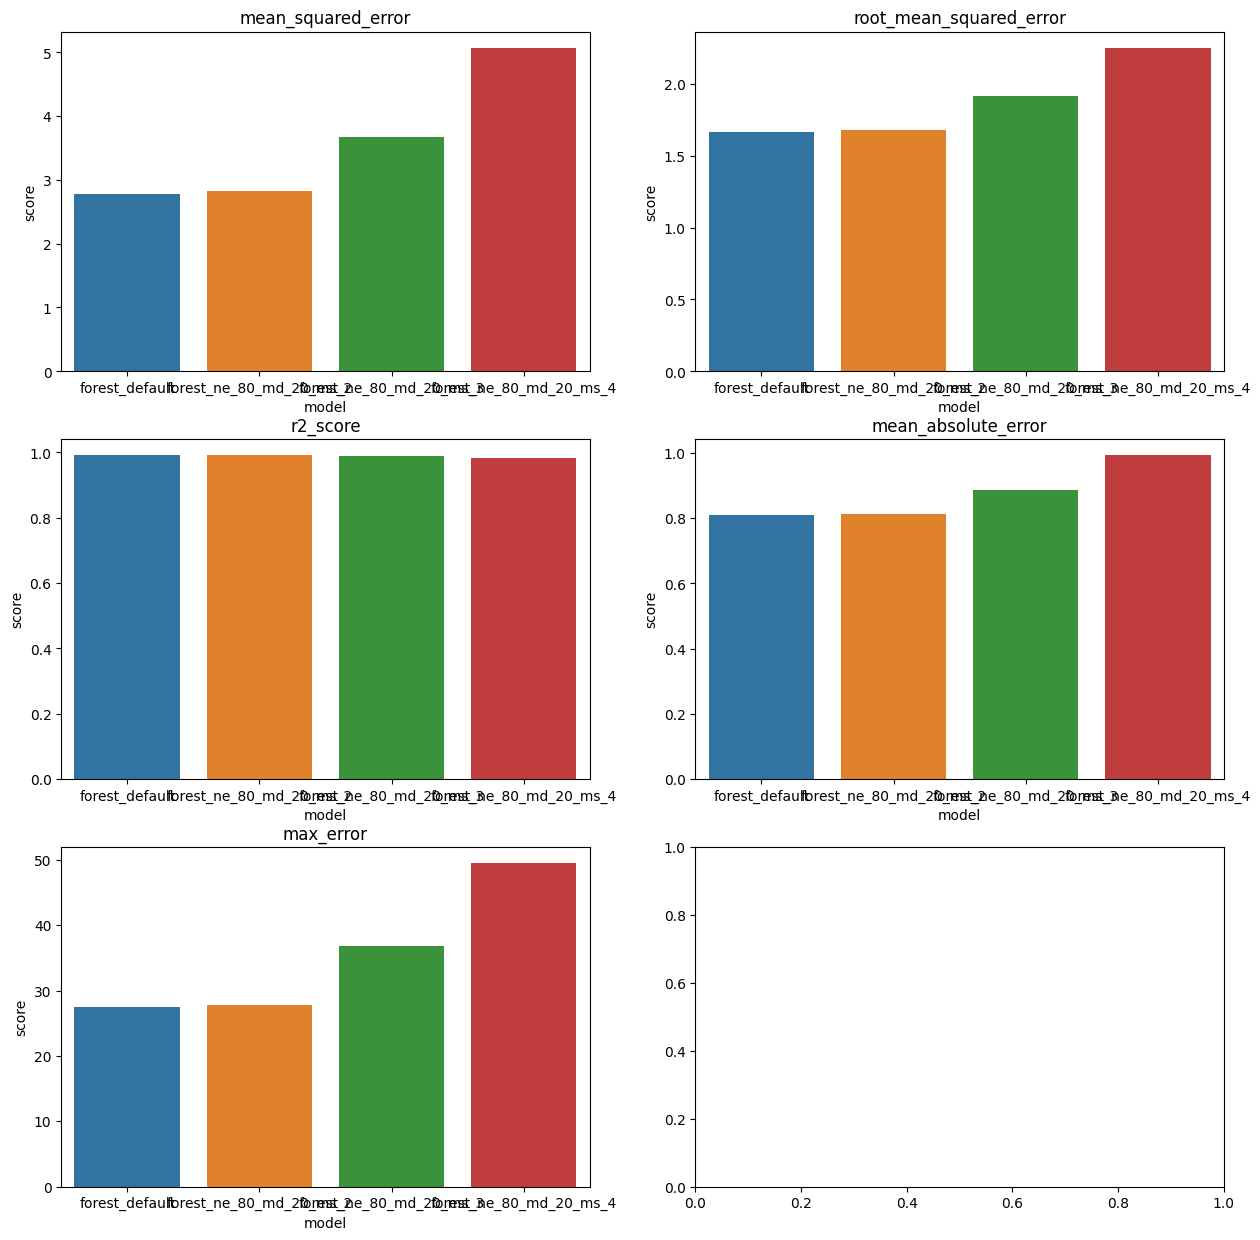

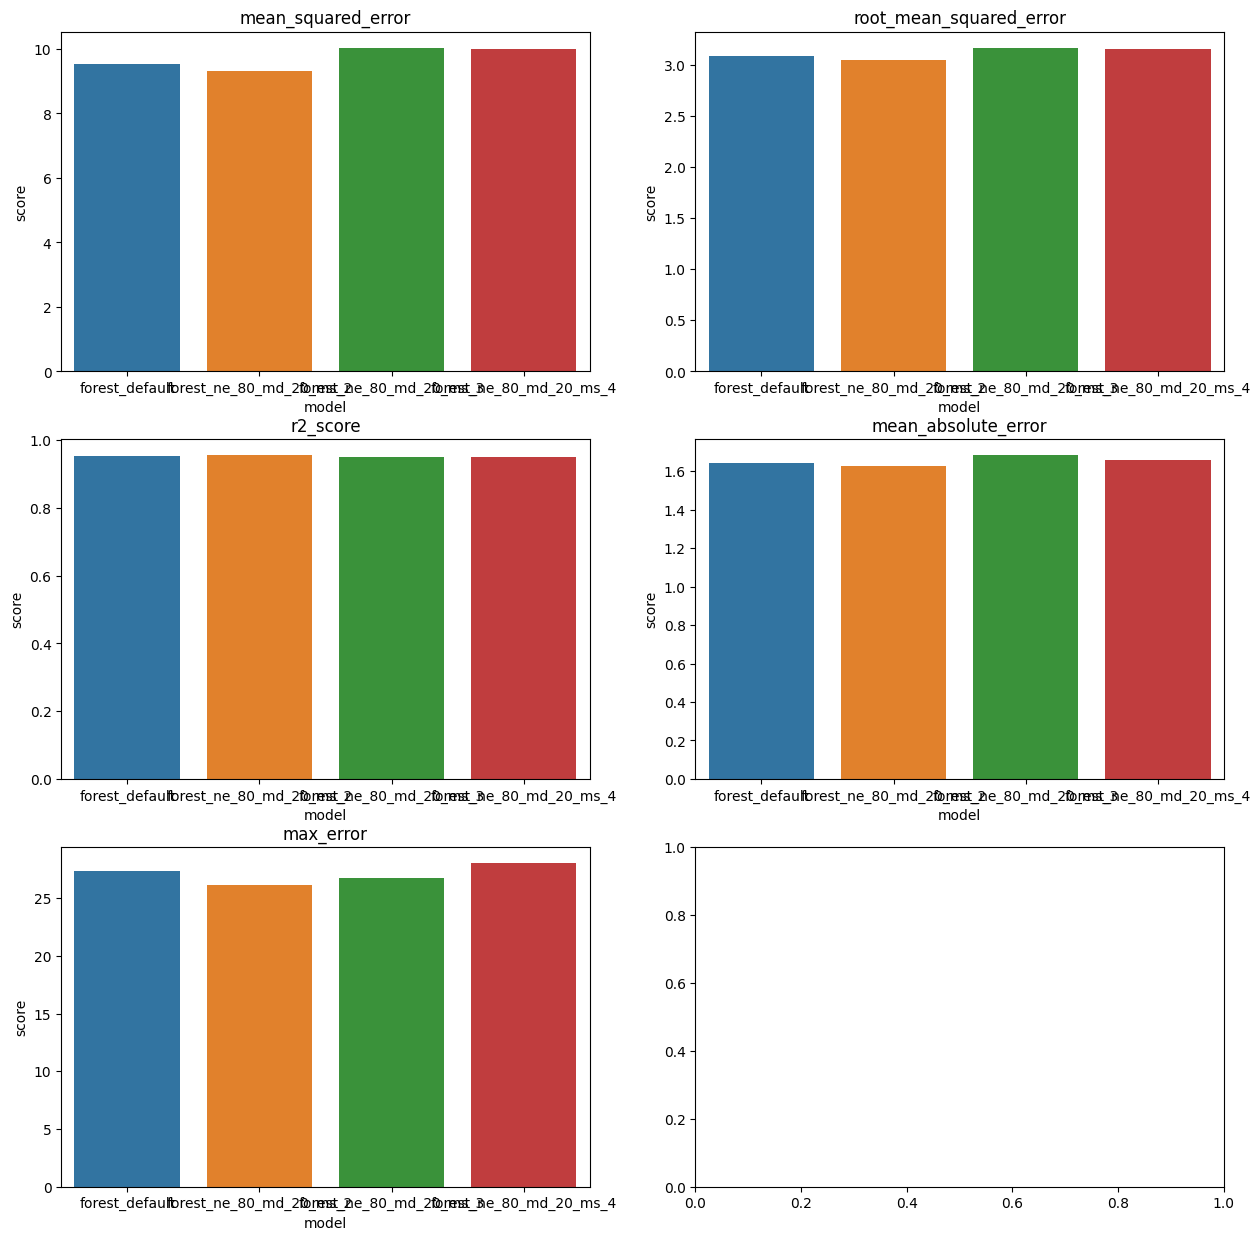

In [64]:
df = ma.visualize_metrics(split='train', verbose=True)

print(f"VAL")
df = ma.visualize_metrics(split='val', verbose=True)
# df = ma.visualize_metrics(split='train')

In [65]:
# save models
ma.save_models(base_path="model/forest")